# Parameter Selection with Preprocessing

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load and split the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(X_train)

# rescale the training data
X_train_scaled = scaler.transform(X_train)

svm = SVC()

# learn an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)

print(f"Test score: {svm.score(X_test_scaled, y_test):.2f}")

Test score: 0.97


In [3]:
from sklearn.model_selection import GridSearchCV

# for illustration purposes only, don't use this code!
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# scaling
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
print(f"Best set score: {grid.score(X_test_scaled, y_test):.2f}")
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.98
Best set score: 0.97
Best parameters:  {'C': 1, 'gamma': 1}


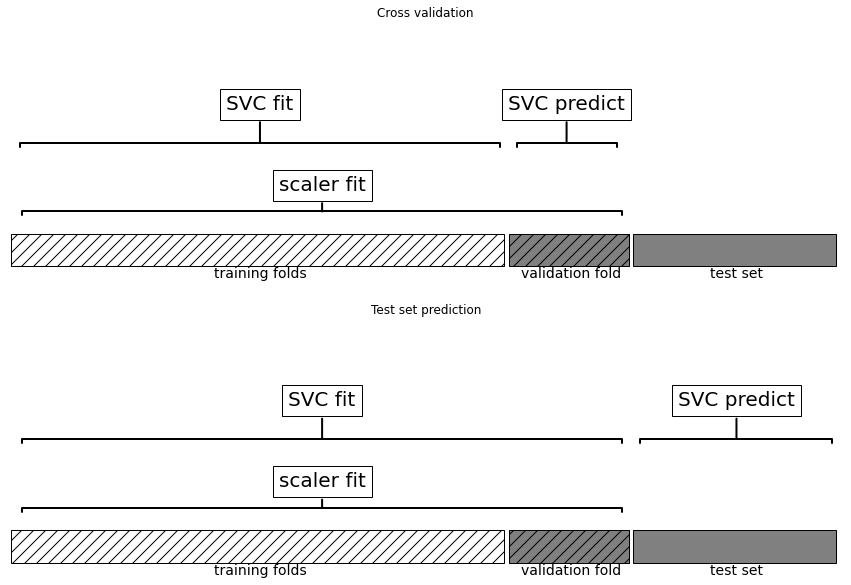

In [4]:
from helpers.plot_improper_preprocessing import plot_improper_processing

plot_improper_processing()